In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("week.csv", header=None, names=["time","counts","span"])

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

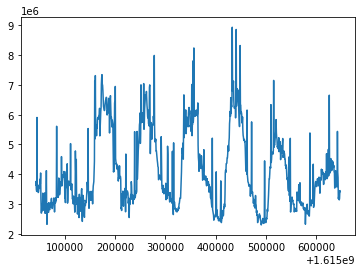

In [5]:
plt.plot(df['time'], df['counts'])

In [13]:
f = np.array(df['counts']).reshape(-1, 1)

In [21]:
f2 = []
for i in f:
    f2.append(float(i))
    
f3 = np.array(f2)

In [22]:
mean = f3[:1008].mean(axis=0)
f3 -= mean
std = f3[:1008].std(axis=0)
f3 /= std

In [23]:
print(f3)

[-0.36574204 -0.27082013 -0.48529168 ... -0.71989074 -0.51451531
 -0.54004247]


In [25]:
def make_dataset(low_data, n_prev=1008):

    data, target = [], []
    maxlen = 126

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)

In [35]:
print(h)

[[3100433]
 [3047820]
 [2974863]
 [2727222]
 [2783226]
 [4782574]
 [4132061]
 [4181188]
 [4497740]
 [3064412]
 [2994568]
 [3087243]
 [2664104]
 [2870052]
 [3208583]
 [3219475]
 [2666232]
 [2545484]
 [3327278]
 [3233155]
 [3088127]
 [3203306]
 [2769481]
 [2911302]
 [2763952]
 [3467858]
 [3515846]
 [2614707]
 [2417450]
 [2837816]
 [3290725]
 [3227294]
 [3095151]
 [3125401]
 [2644446]
 [2552940]
 [2947948]
 [3021744]
 [2949605]
 [3039246]
 [3117200]
 [3053396]
 [3228316]
 [3438633]
 [3733679]
 [3654745]
 [3491473]
 [5534143]
 [3420061]
 [3292667]
 [2857280]
 [3229803]
 [3210003]
 [3127316]
 [3422855]
 [3370965]
 [3207825]
 [3128112]
 [3163334]
 [3290892]
 [3426389]
 [3295694]
 [3006224]
 [3377045]
 [3597516]
 [3691076]
 [3753974]
 [4064929]
 [4436267]
 [7129816]
 [5188970]
 [7311157]
 [5629789]
 [5403951]
 [5640417]
 [5293025]
 [5591979]
 [5548163]
 [5844468]
 [5908112]
 [5850046]
 [5861531]
 [5899920]
 [5975986]
 [5985091]
 [6213347]
 [5287734]
 [5567472]
 [5948030]
 [6105207]
 [6236966]

In [28]:
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Epoch 1/100
3/3 [==============================] - 11s 2s/step - loss: 19719170555904.0000 - val_loss: 15519268732928.0000
Epoch 2/100
3/3 [==============================] - 6s 2s/step - loss: 19916643631104.0000 - val_loss: 15519265587200.0000
Epoch 3/100
3/3 [==============================] - 6s 2s/step - loss: 20190450417664.0000 - val_loss: 15519265587200.0000
Epoch 4/100
3/3 [==============================] - 7s 2s/step - loss: 19956874870784.0000 - val_loss: 15519264538624.0000
Epoch 5/100
3/3 [==============================] - 8s 3s/step - loss: 20131605905408.0000 - val_loss: 15519262441472.0000
Epoch 6/100
3/3 [==============================] - 8s 2s/step - loss: 19823726690304.0000 - val_loss: 15519261392896.0000
Epoch 7/100
3/3 [==============================] - 8s 2s/step - loss: 20096032440320.0000 - val_loss: 15519258247168.0000
Epoch 8/100
3/3 [==============================] - 8s 2s/step - loss: 20032476151808.0000 - val_loss: 15519256150016.0000
Epoch 9/100
3/3 [======

3/3 [==============================] - 9s 3s/step - loss: 19892937949184.0000 - val_loss: 15519158632448.0000
Epoch 68/100
3/3 [==============================] - 11s 3s/step - loss: 20294596034560.0000 - val_loss: 15519155486720.0000
Epoch 69/100
3/3 [==============================] - 9s 3s/step - loss: 20085198028800.0000 - val_loss: 15519154438144.0000
Epoch 70/100
3/3 [==============================] - 9s 3s/step - loss: 20006581567488.0000 - val_loss: 15519152340992.0000
Epoch 71/100
3/3 [==============================] - 9s 3s/step - loss: 19552582238208.0000 - val_loss: 15519151292416.0000
Epoch 72/100
3/3 [==============================] - 9s 3s/step - loss: 19616797556736.0000 - val_loss: 15519149195264.0000
Epoch 73/100
3/3 [==============================] - 8s 3s/step - loss: 19929356566528.0000 - val_loss: 15519146049536.0000
Epoch 74/100
3/3 [==============================] - 11s 4s/step - loss: 19903236014080.0000 - val_loss: 15519145000960.0000
Epoch 75/100
3/3 [=========

In [30]:
predicted = model.predict(g)

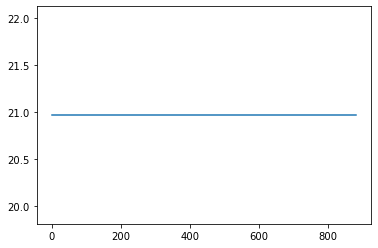

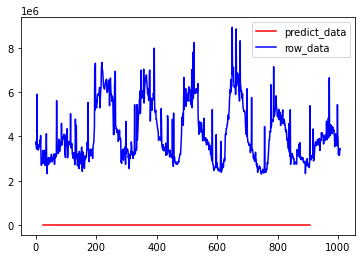

In [31]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()